In [57]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.0)
from pandas.plotting import scatter_matrix
import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [35]:
def save_subgroup(dataframe, g_index, subgroup_name):
    save_subgroup_filename = "".join([subgroup_name,".csv"])
    dataframe.to_csv(save_subgroup_filename, encoding='UTF-8')
    test_df = pd.read_csv(save_subgroup_filename, index_col = g_index, encoding='UTF-8')
    # Test that we recover what we send in
    if dataframe.equals(test_df):
        print("Passed! We created the subgroup")
    else:
        print("Warning -- Double-check-it.")

In [36]:
def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, index_col=index_col)

In [37]:
players = load_subgroup("players.csv")
players.head()

,birthday,height,weight,photoID,rater1,rater2
playerShort,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,3868.jpg,0.25,0.00
aaron-hunt,04.09.1986,183.0,73.0,20136.jpg,0.00,0.25
aaron-lennon,16.04.1987,165.0,63.0,13515.jpg,0.25,0.25
aaron-ramsey,26.12.1990,178.0,76.0,94953.jpg,0.00,0.00
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,124913.jpg,0.25,0.25


In [38]:
players.shape

(2053, 6)

### Do you know? We can visualize the missing values

#####  missigno (msno) provides the distribution of missing values in the dataset by informative visualizations. Using the plots of missingno, we are able to see where the missing values are located in each column and if there is a correlation between missing values of different columns.

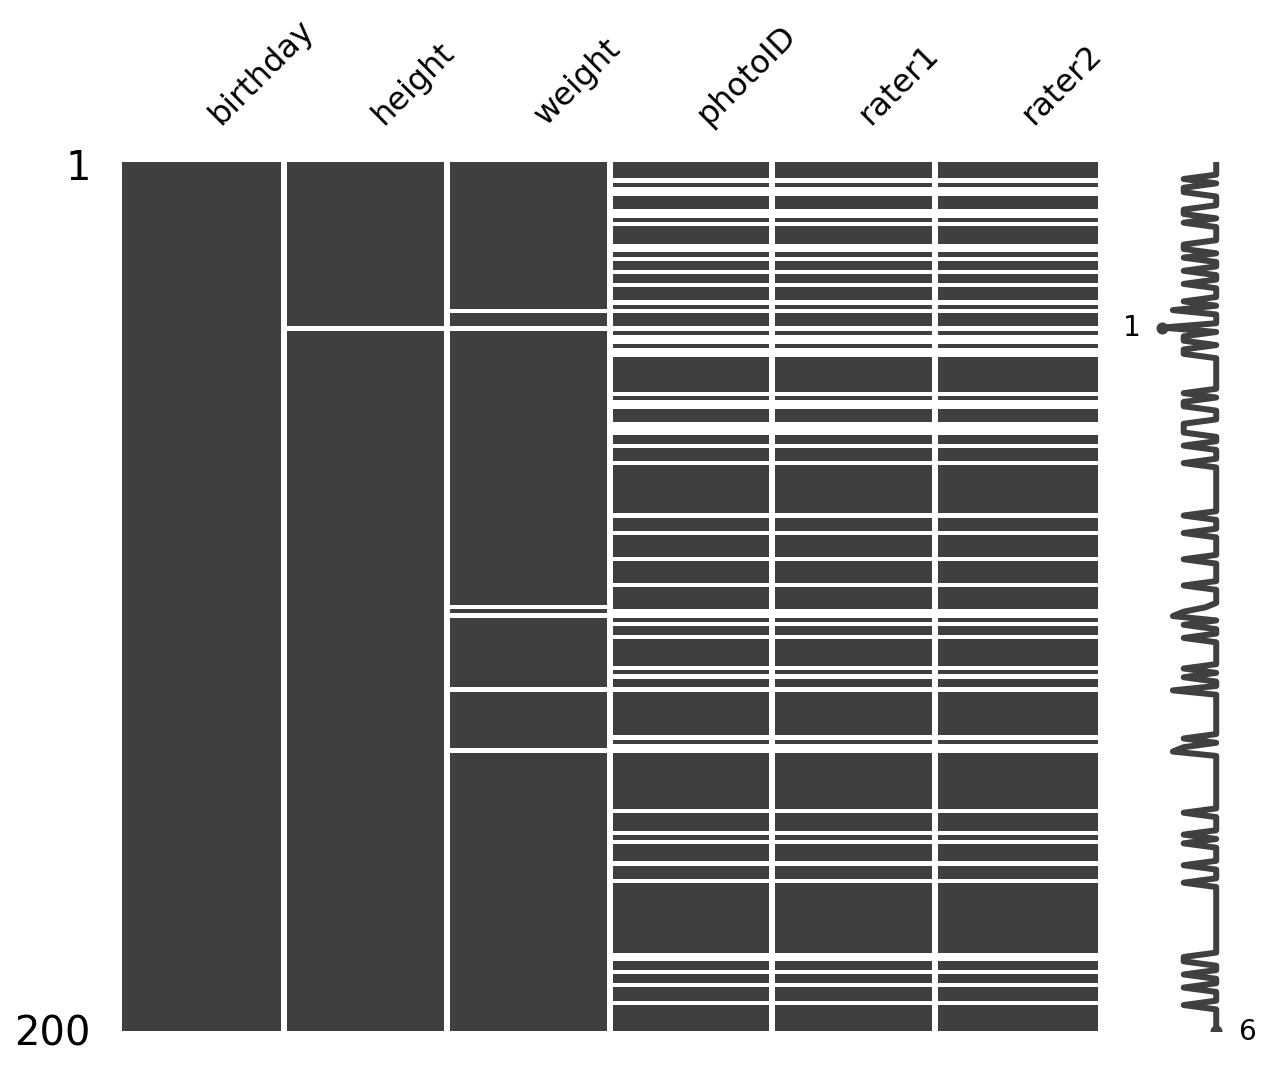

In [39]:
msno.matrix(players.sample(200), figsize=(10, 8), width_ratios=(10, 1))

# checking the missing values visualization 

##### Heatmaps are used to visualize correlation matrices which show the correlation of values between different columns. Missingno library also provides heatmaps that show if there is any correlation between missing values in different columns.

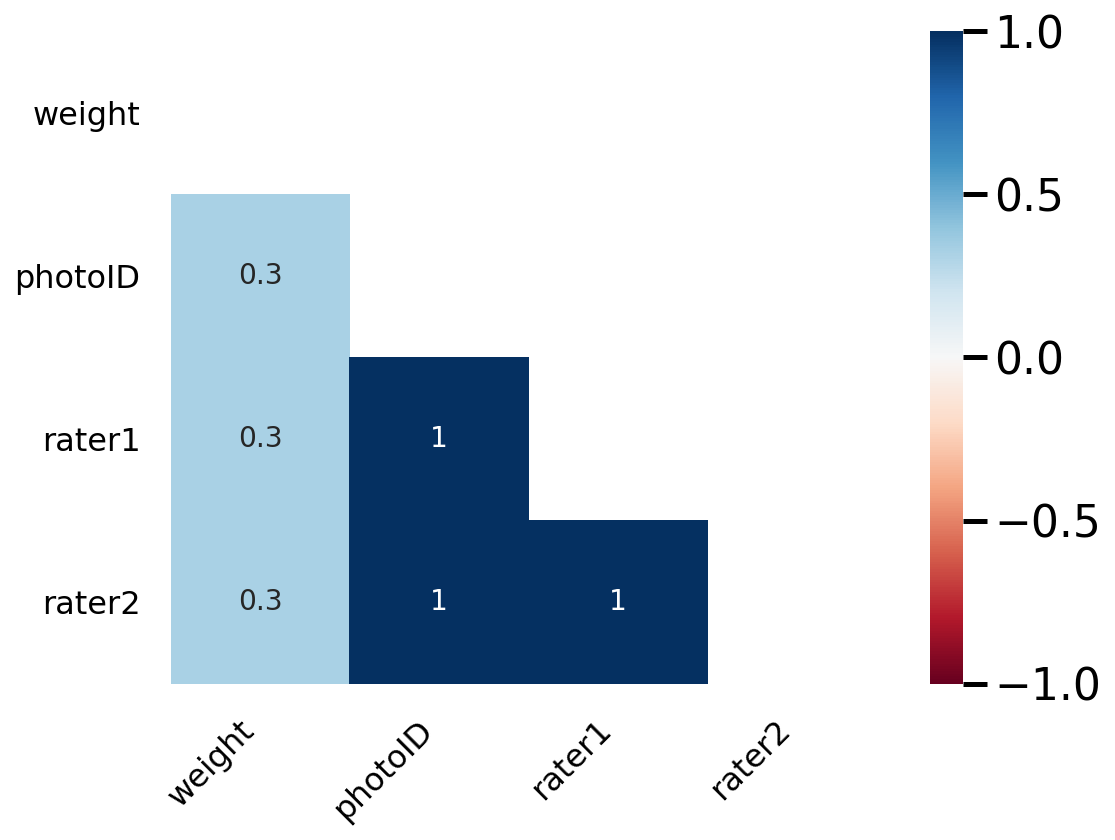

In [40]:
msno.heatmap(players.sample(200),figsize=(8, 6))
# checking the missing values via heatmap

In [41]:
print("Total players:", len(players))
print("rater1 missing values:", len(players[(players.rater1.isnull())]))
print("rater2 missing values:", len(players[players.rater2.isnull()]))
print("Both missing values:", len(players[(players.rater1.isnull()) & (players.rater2.isnull())]))

Total players: 2053
rater1 missing values: 468
rater2 missing values: 468
Both missing values: 468


In [42]:
players = players[players.rater1.notnull()]
players.shape[0]

1585

##### Visualization of missing values after modification

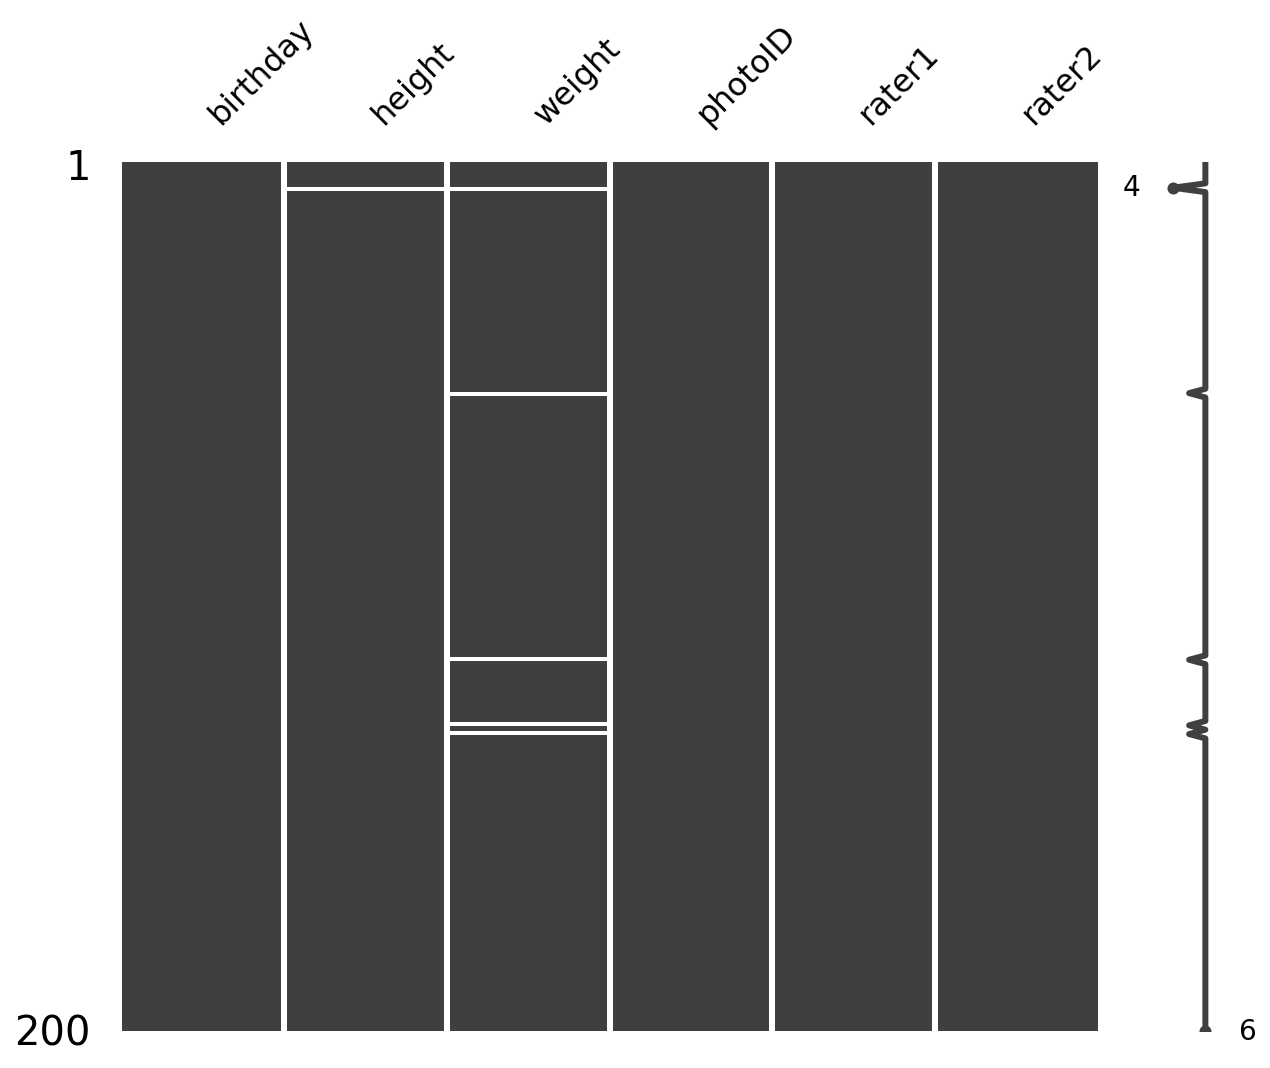

In [43]:
msno.matrix(players.sample(200), figsize=(10, 8), width_ratios=(10, 1))

##### The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.

In [44]:
# finding relationship between rater1 and rater2
pd.crosstab(players.rater1, players.rater2)

rater2,0.00,0.25,0.50,0.75,1.00
rater1,,,,,
0.00,424,200,2,0,0
0.25,27,470,54,0,0
0.50,0,23,116,31,0
0.75,0,0,2,104,34
1.00,0,0,0,6,92


Text(0.5, 1.0, 'Correlation between Rater 1 and Rater 2')

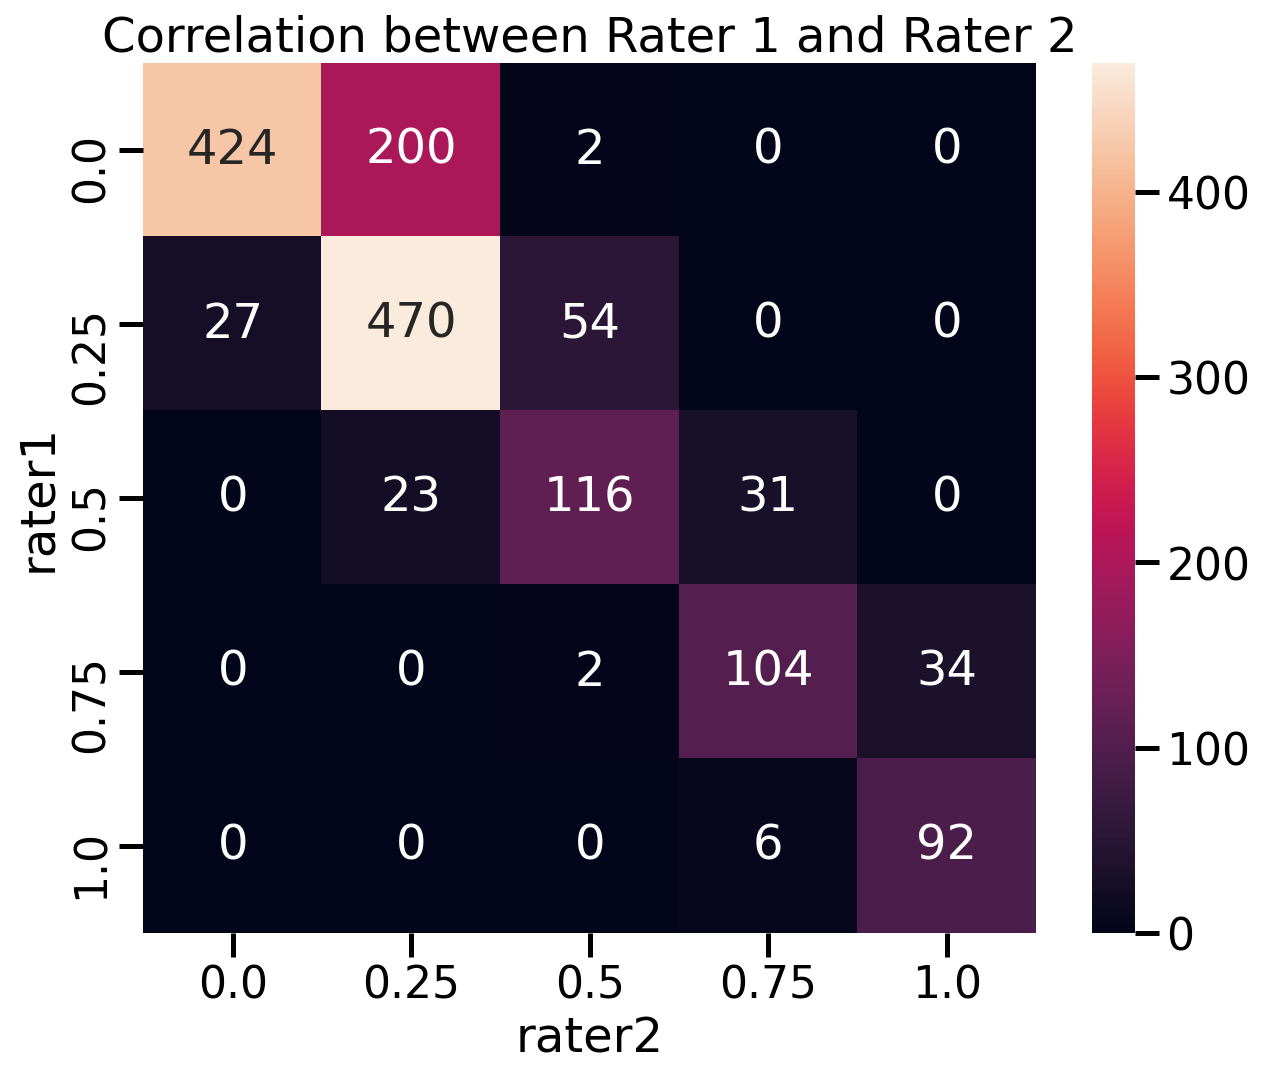

In [49]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pd.crosstab(players.rater1, players.rater2), annot=True, fmt='d')
ax.set_title("Correlation between Rater 1 and Rater 2")

In [50]:
players['skintone'] = players[['rater1', 'rater2']].mean(axis=1)

In [51]:
players.head()

,birthday,height,weight,photoID,rater1,rater2,skintone
playerShort,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,3868.jpg,0.25,0.00,0.125
aaron-hunt,04.09.1986,183.0,73.0,20136.jpg,0.00,0.25,0.125
aaron-lennon,16.04.1987,165.0,63.0,13515.jpg,0.25,0.25,0.250
aaron-ramsey,26.12.1990,178.0,76.0,94953.jpg,0.00,0.00,0.000
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,124913.jpg,0.25,0.25,0.250


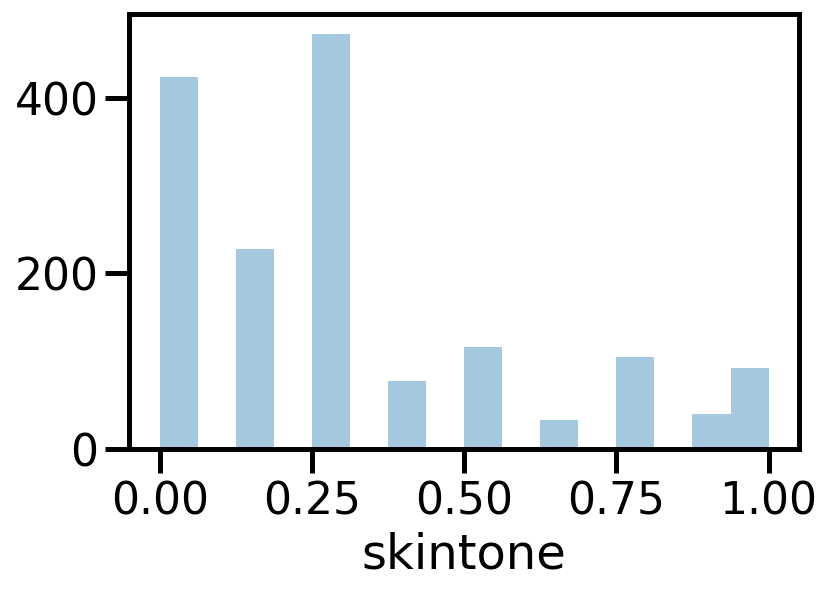

In [52]:
sns.distplot(players.skintone, kde=False);

##### scatter pot of height, weight and skintone

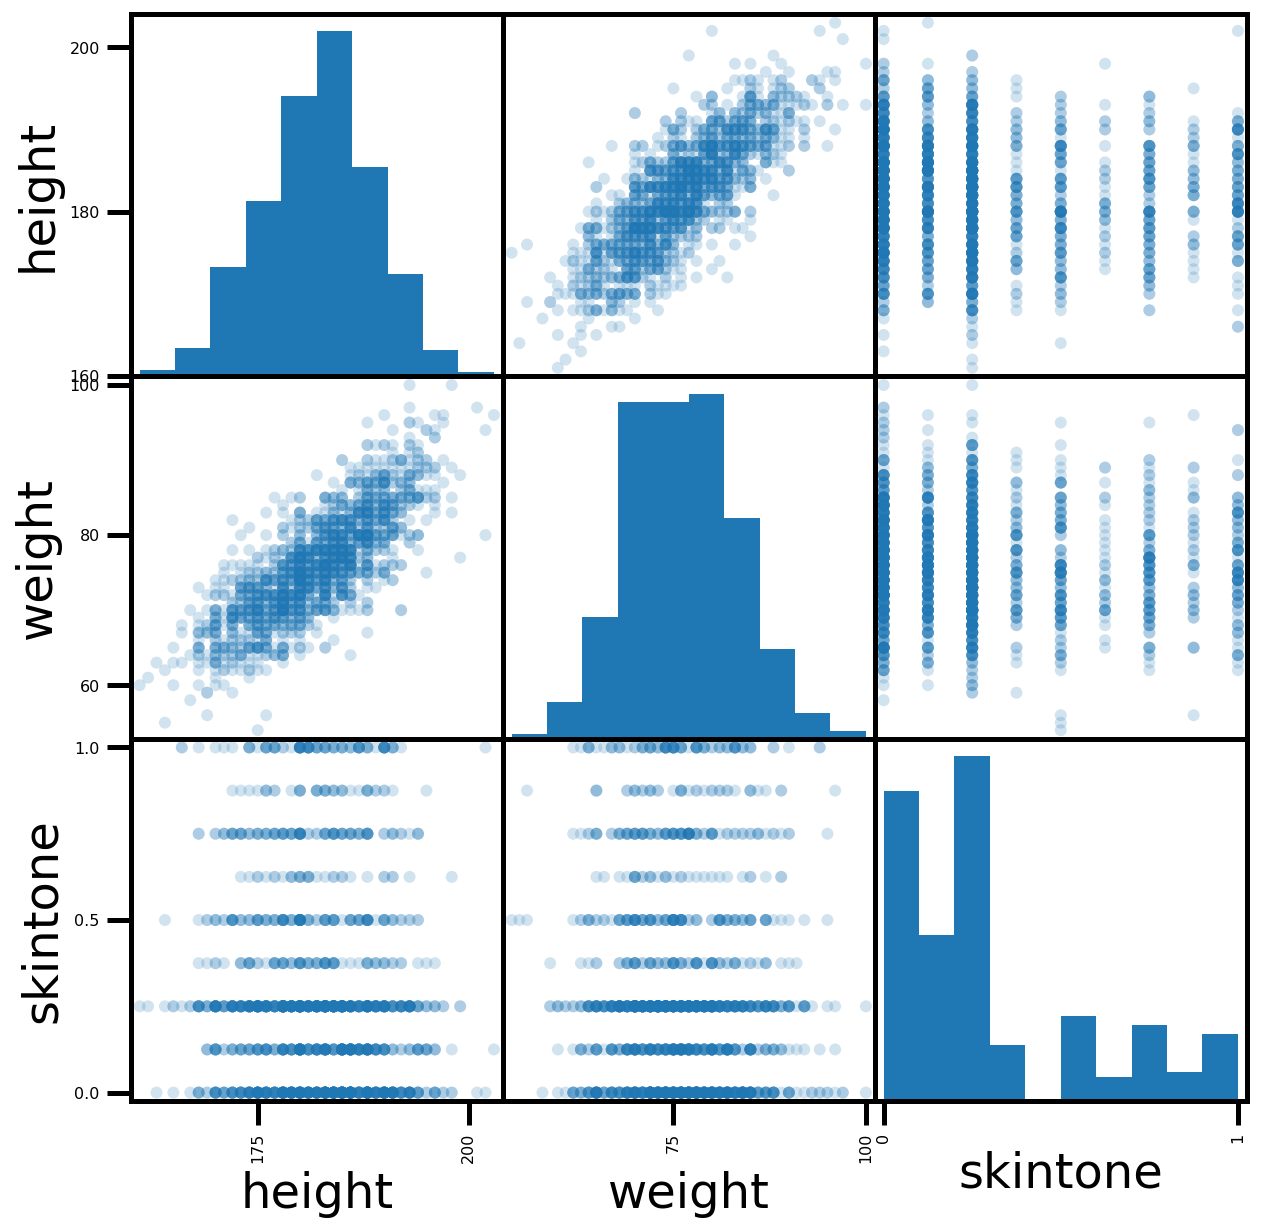

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(players[['height', 'weight', 'skintone']], alpha=0.2, diagonal='hist', ax=ax);

##### The detailed relationship of height and weight

Text(0.5, 0, 'Weight in kg')

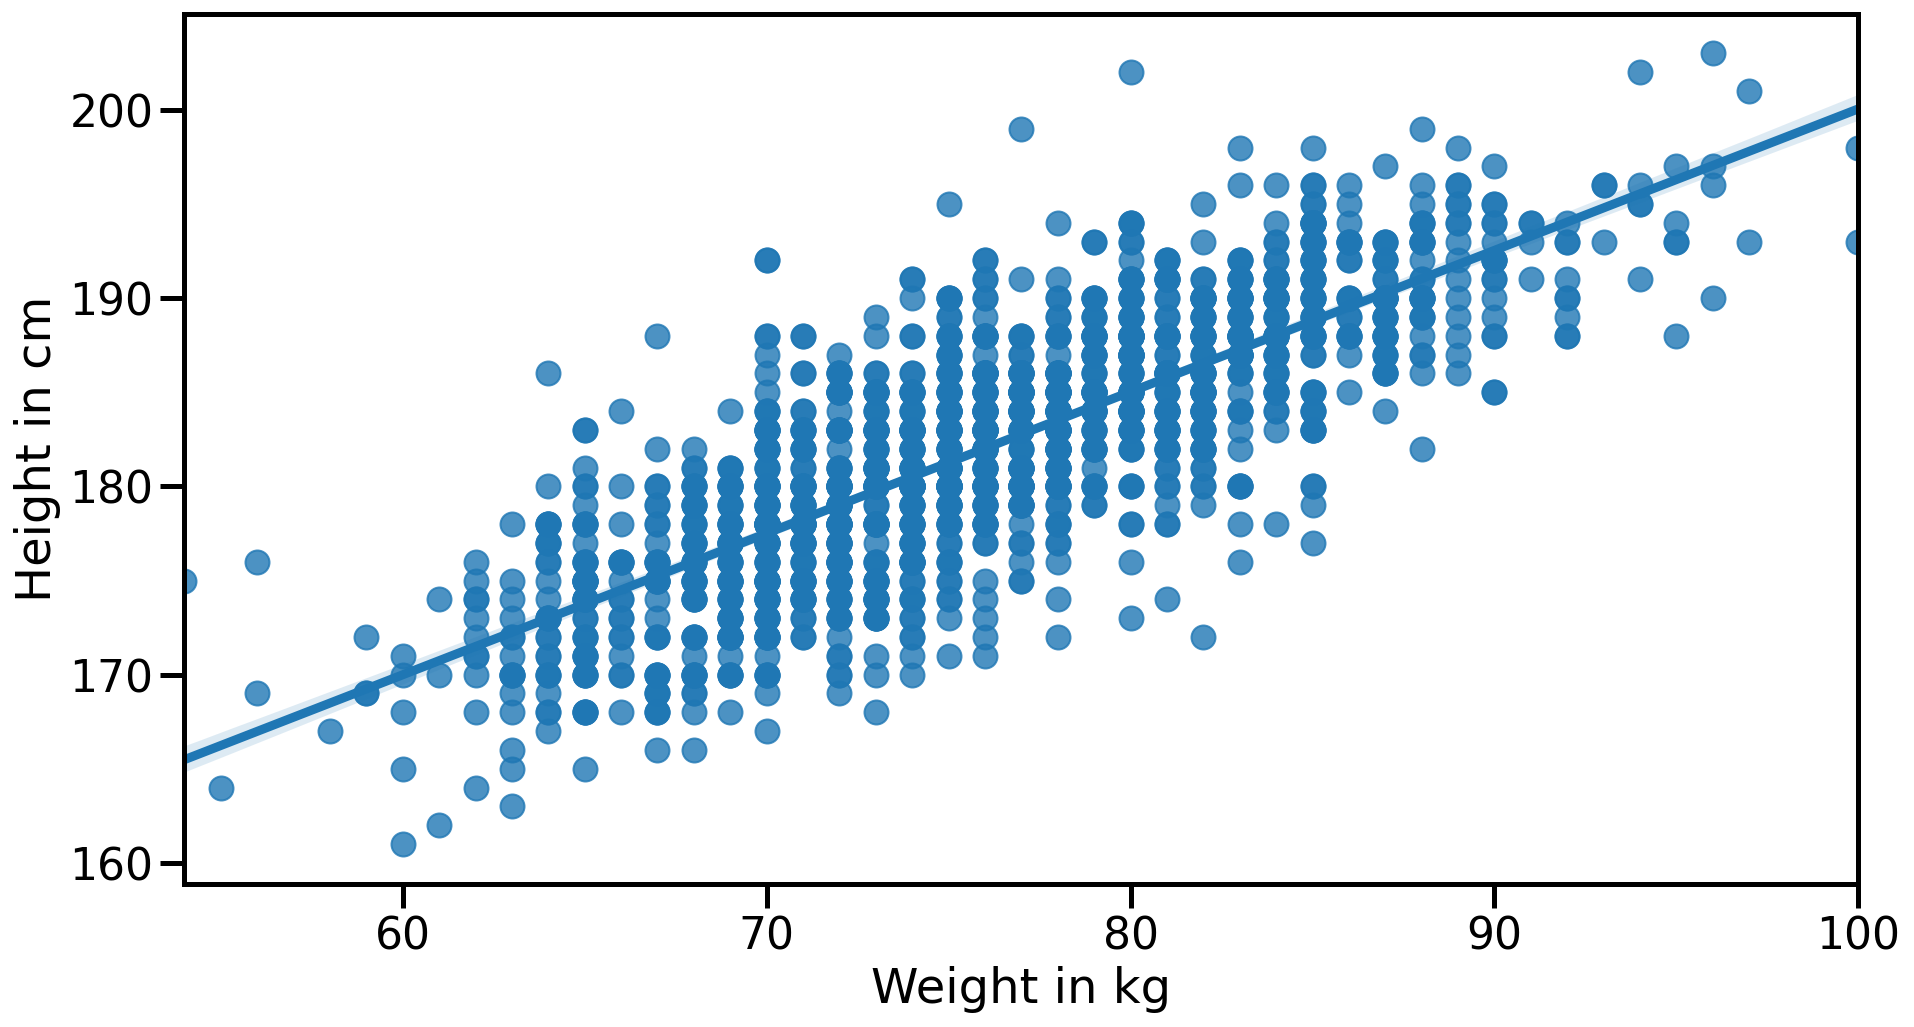

In [64]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot('weight', 'height', data=players, ax=ax)
ax.set_ylabel("Height in cm")
ax.set_xlabel("Weight in kg")

In [73]:
pandas_profiling.ProfileReport(players)